In [1]:
#### import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold




import missingno
import sklearn

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from xgboost import XGBClassifier
from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1pYKNCwkfdr42SFO0TQjpbbF2luFAHZLW"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))

df = df.sample(frac=0.3, random_state = 117, axis = 0)

In [2]:
df.head()

,New_ID,job,education,contact,poutcome,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
21523,21523,5,2,1,1,60,1,0,374,0,0,19,aug,276,2,-1,0,0
18080,18080,7,2,2,1,32,1,0,-31,0,1,30,jul,96,6,-1,0,0
28962,28962,4,2,1,2,48,2,0,-269,0,0,2,feb,167,1,263,3,0
22422,22422,2,2,1,1,49,1,0,1982,1,1,22,aug,73,15,-1,0,0
11522,11522,7,3,1,1,40,1,0,2469,0,1,19,jun,202,2,-1,0,0


In [3]:

X = df.drop(['New_ID','month','day', 'y'], axis = 1)
Y = df['y']

smote = SMOTE(random_state = 42)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [4]:
# Look at the top rows in the data
X.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
21523,5,2,1,1,60,1,0,374,0,0,276,2,-1,0
18080,7,2,2,1,32,1,0,-31,0,1,96,6,-1,0
28962,4,2,1,2,48,2,0,-269,0,0,167,1,263,3
22422,2,2,1,1,49,1,0,1982,1,1,73,15,-1,0
11522,7,3,1,1,40,1,0,2469,0,1,202,2,-1,0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# End of Data Processing

In [6]:
# Separate the data in Train & Test
#X = X.drop(['city', 'city_development_index'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42,  test_size = 0.2)
X_train.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
6870,1,2,1,1,36,2,0,302,0,0,60,6,-1,0
10716,2,1,1,1,39,3,0,1832,0,0,353,2,-1,0
20491,2,2,1,1,34,2,0,27,0,0,256,9,-1,0
30178,9,3,1,2,38,1,0,890,1,0,43,2,-1,0
44962,6,2,1,2,34,1,0,247,0,0,401,2,-1,0


In [7]:
columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

,job,education,contact,poutcome,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous
0,0.706411,1.757765,-0.238486,1.522946,-0.465002,2.154895,-0.134206,-0.061200,0.877344,-0.444739,1.412249,0.055668,-0.424203,-0.309530
1,-0.781261,0.235640,-0.238486,-0.441748,-0.084157,2.154895,-0.134206,-0.465298,-1.139804,-0.444739,-0.774904,-0.241047,-0.424203,-0.309530
2,-0.037425,1.757765,-0.238486,1.522946,1.153591,2.154895,-0.134206,-0.465656,0.877344,-0.444739,-0.472961,0.055668,-0.365922,0.242577
3,0.334493,0.235640,4.193112,1.522946,4.295565,-0.734272,-0.134206,0.073619,-1.139804,-0.444739,-0.368442,0.055668,0.566581,0.242577
4,0.706411,0.235640,-0.238486,-0.441748,-1.131481,0.710311,-0.134206,-0.203190,-1.139804,-0.444739,-0.592964,0.055668,-0.424203,-0.309530


In [8]:
Y_train.value_counts(normalize=True)

0    0.880922
1    0.119078
Name: y, dtype: float64

In [9]:
Y_test.value_counts(normalize=True)

0    0.894582
1    0.105418
Name: y, dtype: float64

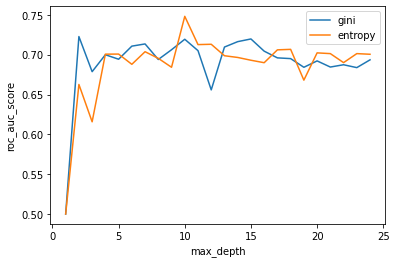

In [10]:
max_depth = []
roc_gini = []
roc_entropy = []
for i in range (1,25):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 42)
    clf.fit(X_train, Y_train)
    Prediction = clf.predict(X_test)
    roc_gini.append(roc_auc_score(Y_test, Prediction))
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 42)
    clf.fit(X_train, Y_train)
    Prediction = clf.predict(X_test)
    roc_entropy.append(roc_auc_score(Y_test, Prediction))
    
    max_depth.append(i)
    
d = pd.DataFrame({'roc_gini':pd.Series(roc_gini), 
 'roc_entropy':pd.Series(roc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','roc_gini', data=d, label='gini')
plt.plot('max_depth','roc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('roc_auc_score')
plt.legend()

In [11]:
%%time
# Train the first DecisionTree to observe how the algorithm behaves
clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 11)
clf.fit(X_train, Y_train)

CPU times: user 54.5 ms, sys: 0 ns, total: 54.5 ms
Wall time: 54.7 ms


DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [12]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 6.66 ms, sys: 0 ns, total: 6.66 ms
Wall time: 8.22 ms


In [13]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.9699133998265114
Test AUC Score 0.7822493740293492
 
Acuracy  0.8805750092148913
ROC_AUC  0.7822493740293492
PR  0.3381752947806441
 
[[2248  179]
 [ 145  141]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2427
           1       0.44      0.49      0.47       286

    accuracy                           0.88      2713
   macro avg       0.69      0.71      0.70      2713
weighted avg       0.89      0.88      0.88      2713



tree.plot_tree(clf)

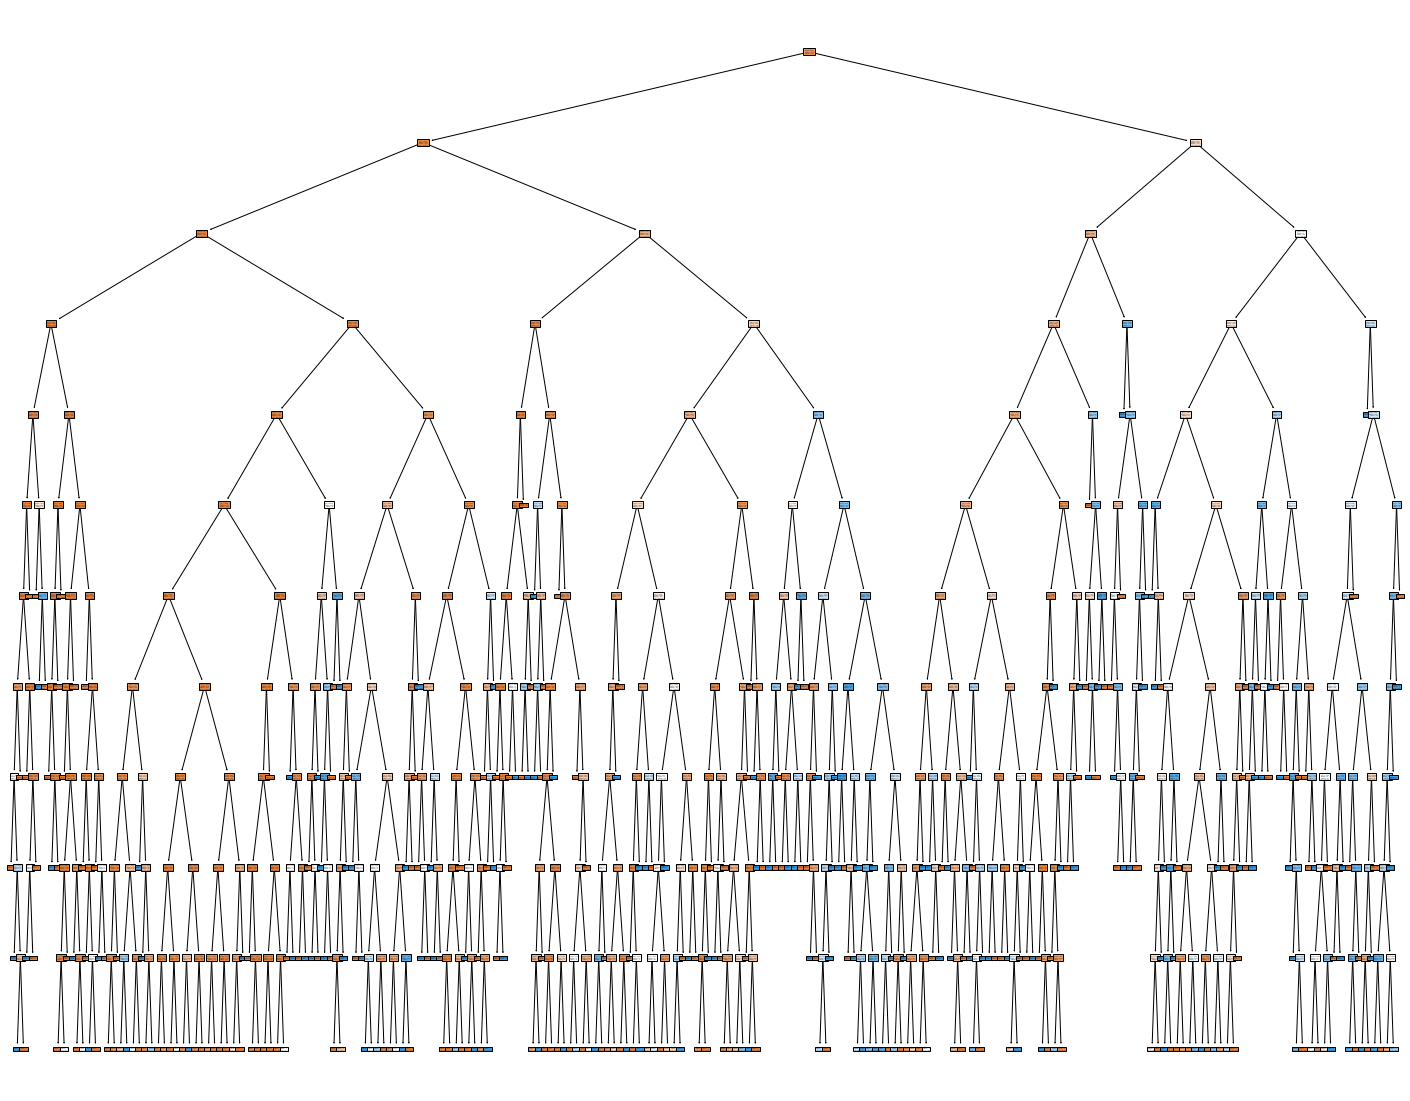

In [14]:
# Plot the Tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

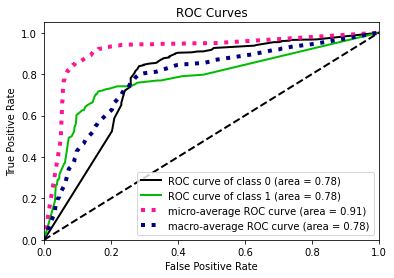

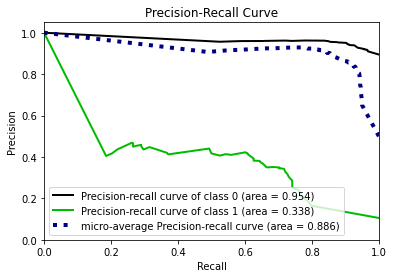

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

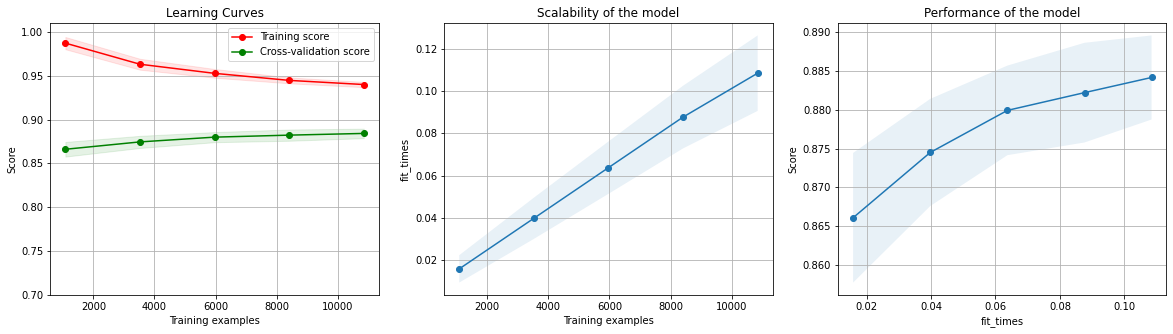

In [15]:
import scikitplot as skplt
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# Prunning the Tree to improve accuracy

## Prune the Tree even further by observing Alphas

In [16]:
# Store the alphas and impurities from the last Tree trained
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

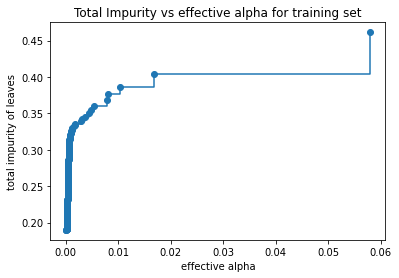

In [17]:
#Plot the relationship between Alphas and impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(
        max_depth = 8,
        criterion = 'entropy',
        ccp_alpha = ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0652944079851403


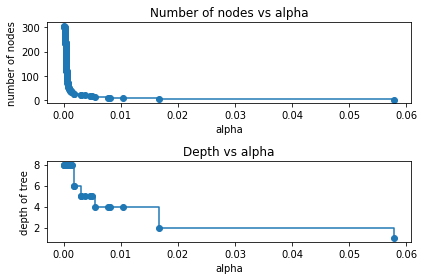

In [19]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

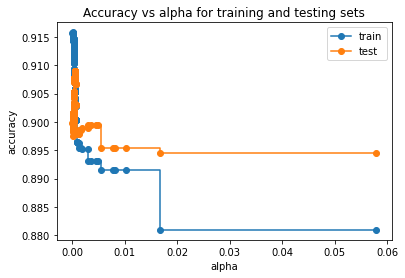

In [20]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
%%time
parameters = [{
    'max_depth' : [7],
    'criterion' : ['entropy'],
    'max_leaf_nodes': list(range(3, 20)),
    'min_samples_split': list(range(2,10))
    ,'ccp_alpha' : [0.002]
}]

GridSearch = GridSearchCV(clf, param_grid = parameters, n_jobs=-1, cv=10, scoring = 'recall')
GridSearch.fit(X_train, Y_train)

CPU times: user 2.07 s, sys: 58.3 ms, total: 2.13 s
Wall time: 21.9 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0, max_depth=9,
                                              max_leaf_nodes=12),
             n_jobs=-1,
             param_grid=[{'ccp_alpha': [0.002], 'criterion': ['entropy'],
                          'max_depth': [7],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='recall')

In [38]:
GridSearch.best_params_

{'ccp_alpha': 0.002,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 16,
 'min_samples_split': 2}

In [66]:
from sklearn.feature_selection import RFE

clf = tree.DecisionTreeClassifier (criterion = 'gini', max_depth =10, ccp_alpha = 0.002, max_leaf_nodes = 16, min_samples_split = 2)

selector = RFE(clf, n_features_to_select=6, step=1)

selector = selector.fit(X, Y)


In [67]:
%%time
#clf = tree.DecisionTreeClassifier (criterion = 'entropy', max_depth = 8, ccp_alpha = 0, max_leaf_nodes = 19, min_samples_split = 2)
clf.fit(X_train, Y_train)

CPU times: user 26.2 ms, sys: 41 µs, total: 26.3 ms
Wall time: 49.5 ms


DecisionTreeClassifier(ccp_alpha=0.002, max_depth=10, max_leaf_nodes=16)

In [68]:
%%time
ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

CPU times: user 6.59 ms, sys: 81 µs, total: 6.67 ms
Wall time: 6.36 ms


In [69]:
y_train_pred = clf.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_test, y_val_pred_pos)

ClassPrediction = clf.predict(X_test)
Probability = clf.predict_proba(X_test)[:,1]

print('Acuracy ', accuracy_score(Y_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_test,Probability))
print('PR ', average_precision_score(Y_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_test, ClassPrediction))
print(classification_report(Y_test, ClassPrediction))

Train AUC Score 0.8435618258933401
Test AUC Score 0.8269807036803329
 
Acuracy  0.900847769996314
ROC_AUC  0.8269807036803329
PR  0.4103053228132116
 
[[2300  127]
 [ 142  144]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2427
           1       0.53      0.50      0.52       286

    accuracy                           0.90      2713
   macro avg       0.74      0.73      0.73      2713
weighted avg       0.90      0.90      0.90      2713



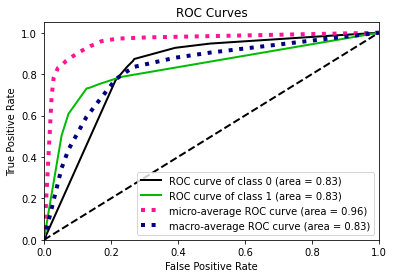

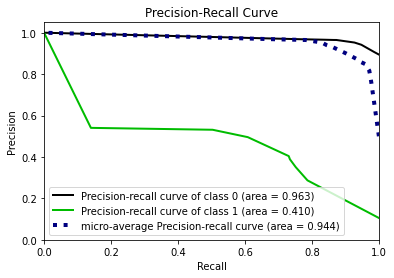

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

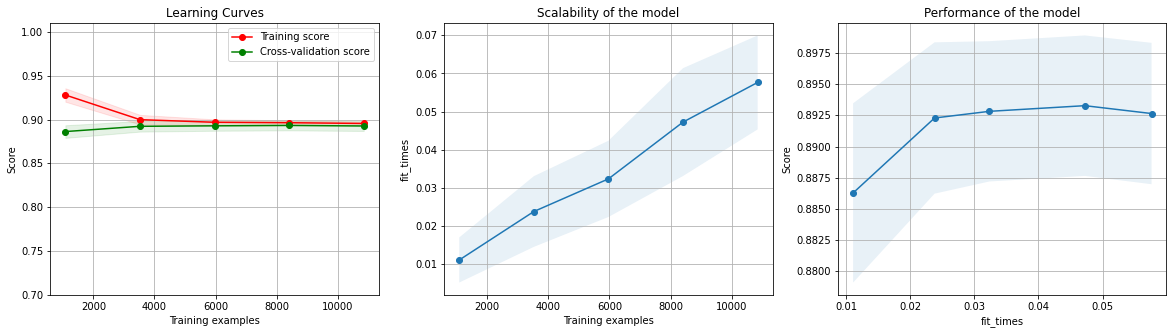

In [70]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_test, y_probas=predicted_probas)
plt.show()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = clf
plot_learning_curve(estimator, "Learning Curves", X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

Understanding Bias & Variance: https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7
https://elitedatascience.com/bias-variance-tradeoff

[Text(197.83636363636364, 199.32, 'X[10] <= 0.825\ngini = 0.21\nsamples = 10850\nvalue = [9558, 1292]'),
 Text(121.74545454545455, 163.07999999999998, 'X[3] <= 2.491\ngini = 0.138\nsamples = 9428\nvalue = [8723, 705]'),
 Text(60.872727272727275, 126.83999999999999, 'X[3] <= 0.535\ngini = 0.102\nsamples = 9050\nvalue = [8561, 489]'),
 Text(30.436363636363637, 90.6, 'gini = 0.061\nsamples = 7733\nvalue = [7491, 242]'),
 Text(91.30909090909091, 90.6, 'X[10] <= -0.353\ngini = 0.305\nsamples = 1317\nvalue = [1070, 247]'),
 Text(60.872727272727275, 54.359999999999985, 'gini = 0.119\nsamples = 648\nvalue = [607, 41]'),
 Text(121.74545454545455, 54.359999999999985, 'X[8] <= -0.096\ngini = 0.426\nsamples = 669\nvalue = [463, 206]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.495\nsamples = 358\nvalue = [196, 162]'),
 Text(152.1818181818182, 18.119999999999976, 'gini = 0.243\nsamples = 311\nvalue = [267, 44]'),
 Text(182.61818181818182, 126.83999999999999, 'X[10] <= -0.469\ngini = 0.

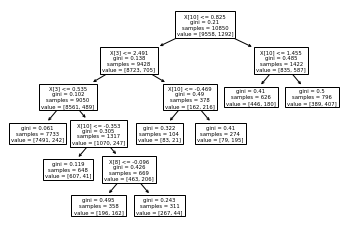

In [71]:
tree.plot_tree(clf)

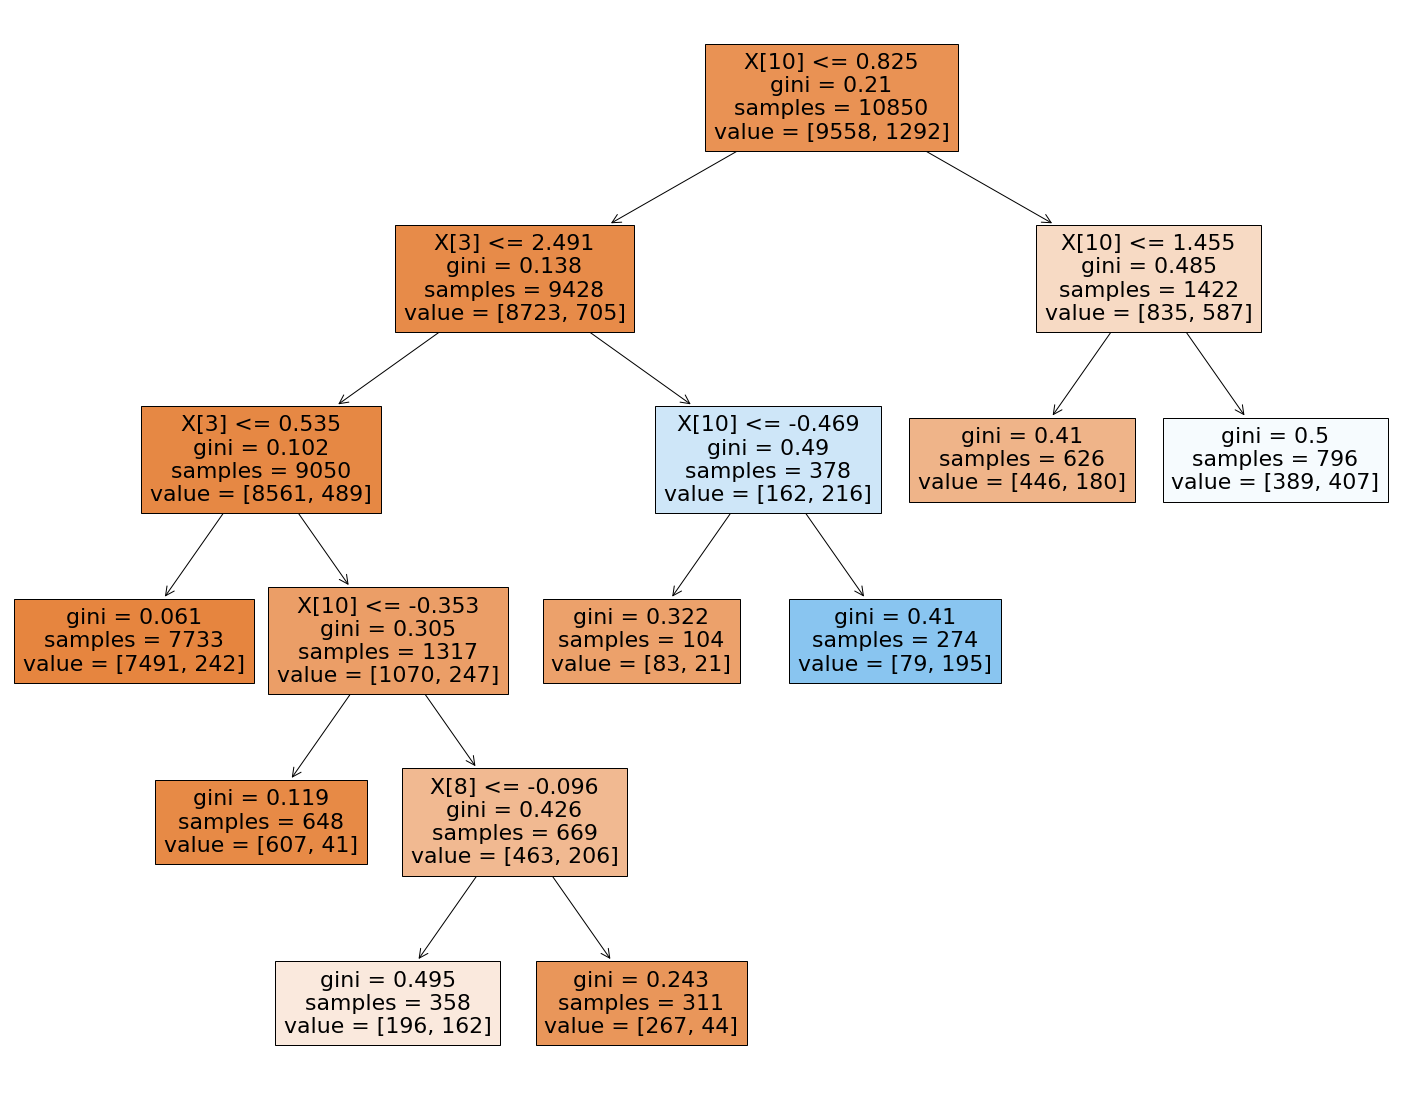

In [72]:
# Plot the Tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)